# ◆Car Fuel Consumption
## 目的：100kmあたりのガソリン消費量を予測する
### 目的変数をconsumeとする回帰問題として、線形回帰モデルを作成する
### kaggle URL:https://www.kaggle.com/anderas/car-consume

### 【手順】
#### 1.データ読込
#### 2.データ前処理
- 事前に予測できない項目は、除外する。
- 目的変数を説明するのに有効そうな説明変数を見つける。
- 目的変数と説明変数の関係を確認するためのグラフを作成する。
- 質的変数が扱えない場合は、ダミー変数に置き換える。

#### 3.モデル生成
- 線形回帰モデルを利用する

#### 4.モデル評価
- 混同行列を作成し、Accuracy、Recall、Precisionを求める

#### ※利用するデータ
・利用するデータ「measurements.csv」（データ数：388行12列）

| 列 | 項目 | 項目名 | 欠損有無 | 利用有無 |
| :--- | :--- | :--- | :---: | :---: |
|  1 | distance | 走行していたキロメートル単位の距離 | - | ○ |
|  2 | consume | ディスプレイに表示される100キロメートルあたりのリットル単位の消費 | - | ○ |
|  3 | speed | 平均速度 | - | ○ |
|  4 | temp_inside | 加熱の設定 | 欠損あり | ○ |
|  5 | temp_outside | 外気温度 | - | ○ |
|  6 | specials | 雨または雪、気候変動が発生している場合（「AC」） | 欠損あり | × |
|  7 | gas_type | ガソリンの種類 | - | ○ |
|  8 | AC | ホットエンコードされた特別な「AC」 | - | ○ |
|  9 | rain | 雨/雪 | - | ○ |
| 10 | sun | 晴れ | - | ○ |
| 11 | refill liters | リフィルリッター | 欠損あり | × |
| 12 | refill gas| リフィルガス | 欠損あり | × |

In [33]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix,precision_recall_fscore_support
from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# 警告非表示
import warnings
warnings.filterwarnings('ignore')


▼ consumeの外れ値を確認


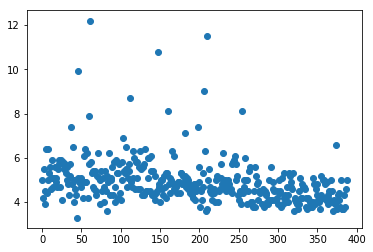


▼ distanceの外れ値を確認


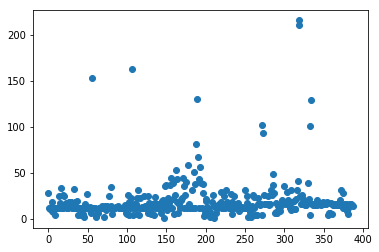


▼ speedの外れ値を確認


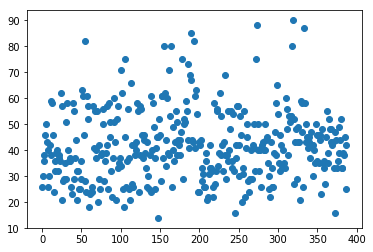


▼ データのヒストグラムを確認


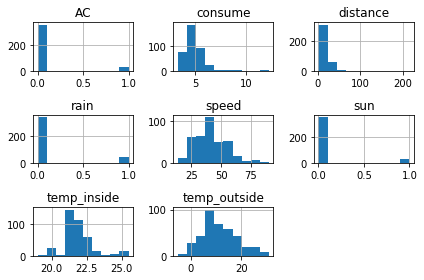


▼ 先頭データ5件


,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_E10,gas_type_SP98
id,,,,,,,,,,
0,0.368714,5.0,-1.172804,-0.434544,0.091908,0,0,0,1,0
1,-0.338044,4.2,-0.878274,-0.434544,0.235123,0,0,0,1,0
2,-0.373381,5.5,-0.289216,-0.434544,0.521552,0,0,0,1,0
3,-0.298288,3.9,-0.436480,-0.434544,0.378338,0,0,0,1,0
4,-0.050923,4.5,0.299843,-0.434544,0.521552,0,0,0,1,0



▼ 統計量確認


In [34]:
# データセット読込
df = pd.read_excel("./measurements2.xlsx")

# 欠損項目および不要項目を削除
df = df.drop(['specials','refill liters','refill gas'], axis=1)

# 欠損値の補完
df['temp_inside'] = df['temp_inside'].fillna(df['temp_inside'].median()) # 中央値

#print("\n▼ 欠損項目を確認")
#print(df.isnull().sum())

print("\n▼ consumeの外れ値を確認")
plt.scatter(df.index, df['consume'])
plt.show()

print("\n▼ distanceの外れ値を確認")
plt.scatter(df.index, df['distance'])
plt.show()

print("\n▼ speedの外れ値を確認")
plt.scatter(df.index, df['speed'])
plt.show()

# データのヒストグラムを表示
print("\n▼ データのヒストグラムを確認")
#rcParams['figure.figsize'] = 10, 10
viz = df[['AC','rain','sun','temp_inside','temp_outside','speed','consume','distance']]
viz.hist()
plt.tight_layout()
plt.show()

# ダミー変換
df = pd.get_dummies(df, columns=['gas_type'])

# データを標準化
scaler = StandardScaler()        
df['temp_inside'] = scaler.fit_transform(df.loc[:, ['temp_inside']])
df['temp_outside'] = scaler.fit_transform(df.loc[:, ['temp_outside']])
df['distance'] = scaler.fit_transform(df.loc[:, ['distance']])
df['speed'] = scaler.fit_transform(df.loc[:, ['speed']])

df.index.name="id"

print("\n▼ 先頭データ5件")
display(df.head())

print("\n▼ 統計量確認")
#df.describe()
#print(df.info())



▼ データのヒストグラムを確認


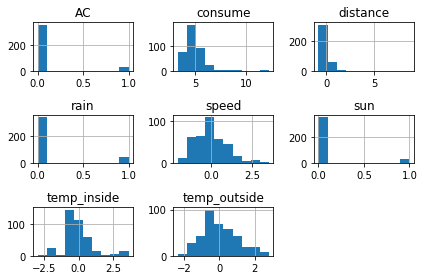

In [35]:
# データのヒストグラムを表示
print("\n▼ データのヒストグラムを確認")
viz = df[['AC','rain','sun','temp_inside','temp_outside','speed','consume','distance']]
viz.hist()
plt.tight_layout()
plt.show()


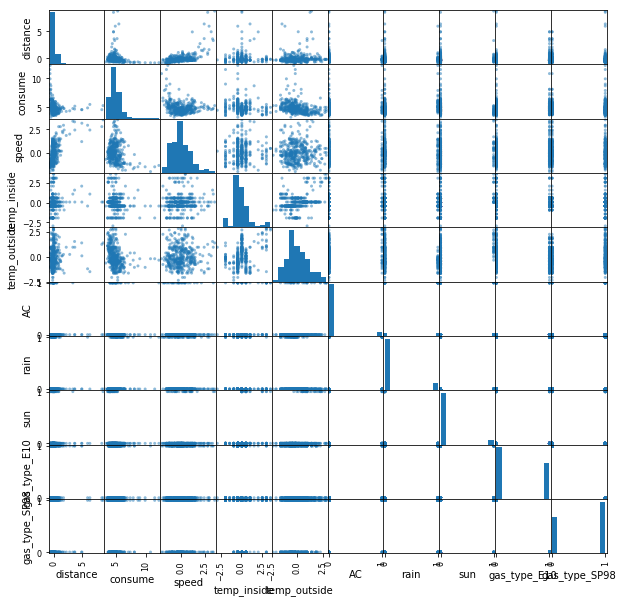

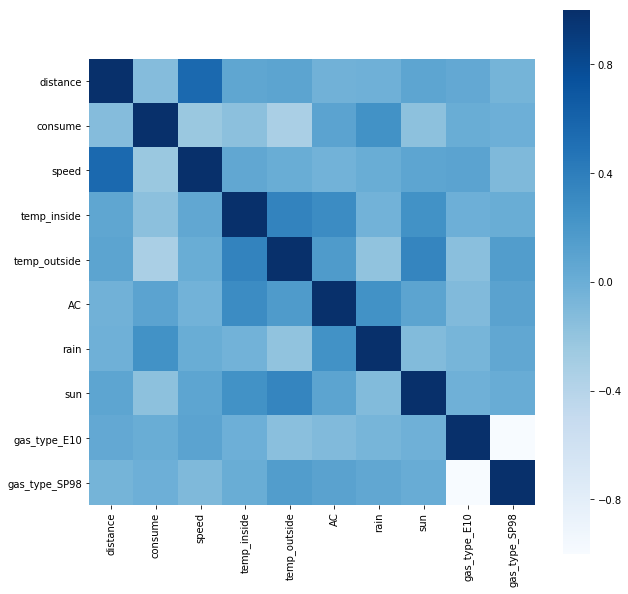

In [36]:
# 散布図行列
#sns.pairplot(df)
#plt.show()

# 散布図行列を書いてみる
pd.plotting.scatter_matrix(df, figsize=(10,10))
plt.show()

# 相関係数をヒートマップにして可視化
df.corr()
plt.figure(figsize=(10, 10)) 
sns.heatmap(df.corr(), square=True, cmap='Blues')
plt.show()


In [37]:
# 係数を求める
y = df["consume"].values
X = df.drop('consume', axis=1).values

# 線形回帰モデル生成
regr = LinearRegression(fit_intercept=True)

# 学習
regr.fit(X, y)

# リスト型へ変換
n_features = list(df.drop('consume', axis=1).columns)
fti = regr.coef_.tolist()

print("\n▼ 各重みを表示")
print('w0 = {:.3f}'.format(regr.intercept_))
for i, feature in enumerate(n_features):
    print(feature.ljust(30, ' ') + "---->   w{:.0f} = {:.3f}".format(i + 1, fti[i]))
    #print('\t{0:30s} : {1:>.6f}'.format(feature, fti[i]))


▼ 各重みを表示
w0 = 4.826
distance                      ---->   w1 = 0.045
speed                         ---->   w2 = -0.248
temp_inside                   ---->   w3 = -0.077
temp_outside                  ---->   w4 = -0.277
AC                            ---->   w5 = 0.468
rain                          ---->   w6 = 0.521
sun                           ---->   w7 = -0.131
gas_type_E10                  ---->   w8 = 0.018
gas_type_SP98                 ---->   w9 = -0.018


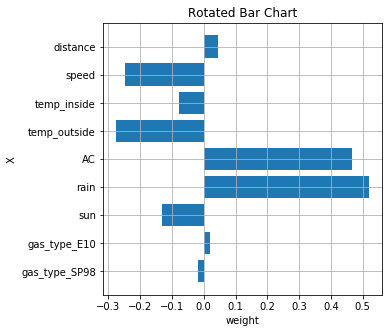

In [38]:
# グラフ化  
plt.figure(figsize=(5, 5))
plt.barh(np.arange(len(n_features))[::-1], fti, align='center')
plt.yticks(np.arange(len(n_features))[::-1], n_features)
plt.title('Rotated Bar Chart')
plt.xlabel('weight')
plt.ylabel('X')
plt.grid()
plt.show()

In [39]:
# 目的変数を予測
y_pred = regr.predict(X) # 関数を使用する

# 二乗誤差
squared_error2 = 0.5 * np.sum((y - y_pred) ** 2)
print('二乗誤差 = {:.3f}'.format(squared_error2))

# MSEを計算
mse = mean_squared_error(y, y_pred) 
print("MSE = %s"%round(mse,3) )  

# MAEを計算
mae = mean_absolute_error(y, y_pred) 
print("MAE = %s"%round(mae,3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

二乗誤差 = 163.903
MSE = 0.845
MAE = 0.618
RMSE = 0.919
